<a href="https://colab.research.google.com/github/VaniVerma16/Masked-Robber-vs-Man/blob/main/MaskedRobbervsNormalVisitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
    print("Successfully connected!")
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

Successfully connected!


In [2]:
!pip install -Uqq fastai

In [3]:
!pip install -Uqq fastbook

In [5]:
from fastcore.all import *
from fastbook import *
def search_images(term, max=30):
    print(f"Searching for '{term}'")
    results = search_images_ddg(term, max_images=max)
    return results

In [6]:
urls = search_images('masked robber man', max=10)
urls[0]

Searching for 'masked robber man'


'https://i.pinimg.com/originals/d5/a8/93/d5a8934c1c92f987fb77a8de0c027998.jpg'

In [7]:
urlsman = search_images('man', max=10)
urlsman[6]

Searching for 'man'


'https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=100063958422946'

In [8]:
from google.colab import drive
from PIL import Image

# Mount Google Drive for fast, responsible access to files
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
from fastdownload import download_url
dest = '/content/drive/MyDrive/Colab Notebooks'
fpath = download_url(urls[8], dest, show_progress=True)
fpath

Path('/content/drive/MyDrive/Colab Notebooks/4.jpg')

In [10]:
destman = '/content/drive/MyDrive/Colab Notebooks/'
fpathman = download_url(urlsman[8], destman, show_progress=True)
fpathman

Path('/content/drive/MyDrive/Colab Notebooks/portrait-man-23523062.jpg')

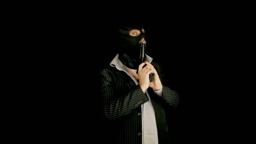

In [11]:
from fastai.vision.all import *
from PIL import Image
im = Image.open(fpath)
im.to_thumb(256,256)

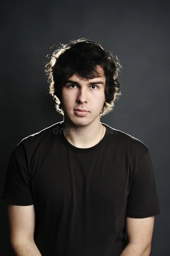

In [12]:
from fastai.vision.all import *
from PIL import Image
im = Image.open(fpathman)
im.to_thumb(256,256)

In [13]:
searches = 'masked robber man', 'man'
path = Path('/content/drive/MyDrive/Colab Notebooks/masked_man_or_not')
from time import sleep
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'masked robber man photo'
Searching for 'man photo'


In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

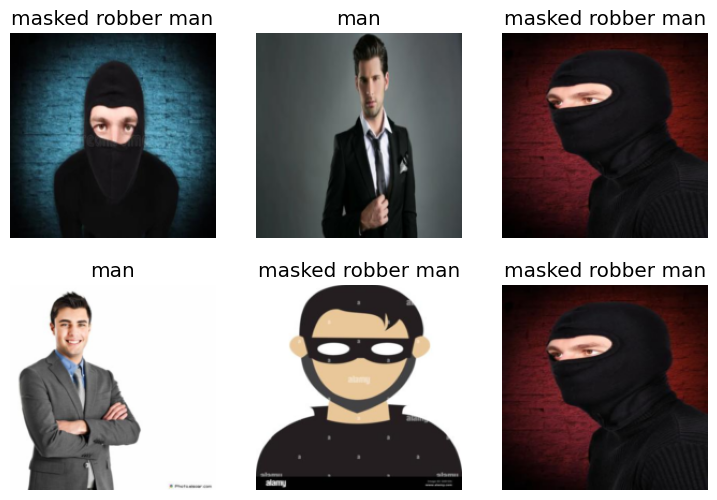

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)
dls.show_batch(max_n=6)

In [16]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.310385,0.197843,0.042254,00:43


epoch,train_loss,valid_loss,error_rate,time
0,0.190661,0.166265,0.056338,01:06
1,0.127938,0.169536,0.042254,01:06
2,0.101321,0.152102,0.042254,01:04


This is a: masked robber man.
Probability it's a masked robber man: 0.9400


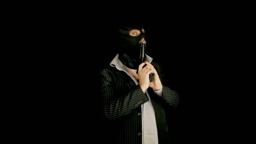

In [17]:
is_masked,_,probs = learn.predict(PILImage.create(fpath))
print(f"This is a: {is_masked}.")
print(f"Probability it's a masked robber man: {probs[2]:.4f}")
Image.open(fpath).to_thumb(256,256)